# Introduction to Artificial Intelligence Coursework

> This notebook contains all the answers to the Question 1 of the Summative Assessment for EMATM0044: Introduction to AI Coursework Part 1

---

# Contents

* [1. Introduction](#1.)
* [2. Importing Libraries](#2.)
* [3. Data](#3.)
    * [3.1. Context](#3.1.)
    * [3.2. Feature Information](#3.2.)
* [4. Data Pre-Processing](#4.)
* [5. Exploratory Data Analysis](#5.)
* [6. Modelling](#6.)
    * [6.1. K-Nearest Neighbors (KNN) Regressor](#6.1.)
        * [6.1.1. Hyperparameter Tuning](#6.1.1.)
    * [6.2. Decision Tree (DT) Regressor](#6.2.)
        * [6.2.1. Hyperparameter Tuning](#6.2.1.)
* [7. Evaluating on Test](#7.)       
* [8. Conclusion](#8.)
* [9. References](#9.)

---

# 1. Introduction <a class="anchor" id="1."></a>

> * In this notebook, I have chosen to explore the following two algorithms in detail:
> * **K-Nearest Neighbors (KNN) Regressor** 
> * **Decision Tree (DT) Regressor**
    

---

# 2. Importing Libraries <a class="anchor" id="2."></a>

In [1]:
# general libraries
import numpy as np
import pandas as pd 

# data visualiztion libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# statistic and machine learning libraries
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
import calendar

# warnings
from warnings import filterwarnings
filterwarnings('ignore')

---

# 3. Data <a class="anchor" id="3."></a>

## 3.1. Context <a class="anchor" id="3.1."></a>

> * Description of the data set as per the coursework specification:
    * This dataset consists of the number of rental bikes out for rent at each hour (column Rented Bike count), together with other features such as the hour of the day, the date, humidity, and so on. 
    * The main purpose of this dataset is to predict the number of rental bikes out at each hour, given the values of the other features of the dataset

In [2]:
# loading the data set
df = pd.read_csv("C:\\Users\\revon\\OneDrive - University of Bristol\\MSc DS @UoB\\TB-2\\Introduction to Artificial Intelligence\\AI Summative Assesment\\coursework_other.csv")

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


## 3.2. Feature Information <a class="anchor" id="3.2."></a>

> There are a total of 3 categorical features and 10 numerical features 

> * **Target Feature:**
    * **Rented Bike Count**: Number of bikes rented

> * **Remaining Features:** 
    * **Date**: Date on which the bikes were rented
    * **Hour**: Hour at when the bikes were rented
    * **Temperature(�C)**: Temperature in Celsius on a particular day and hour
    * **Humidity(%)**: Humidity percentage on a particular day and hour
    * **Wind speed (m/s)**: Wind speed in meters per second on a particular day and hour
    * **Visibility (10m)**: Visibility on a particular day and hour
    * **Dew point temperature(�C)**: Dew point Temperature in Celsius on a particular day and hour
    * **Solar Radiation (MJ/m2)**: Solar radiation in megajoule per square meter on a particular day and hour
    * **Rainfall(mm)**: Rainfall in millimeters on a particular day and hour
    * **Snowfall (cm)**: Snowfall in centimeters on a particular day and hour
    * **Seasons**: Season on a particular day
    * **Holiday**: Was it a holiday?
    * **Functioning Day**: Was it a functioning day?

---

# 4. Data Pre-Processing <a class="anchor" id="4."></a>

In [5]:
# general information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(�C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(�C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
# general information of the dataset
df.describe()

,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
# number of unique values in each feature
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(�C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(�C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [8]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

- There are no missing values

In [9]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True) #converting the 'Date' column to datetime data type

In [10]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df = df.drop(['Date'], axis = 1)

In [11]:
df['Year'].value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

In [12]:
df_2017 = df[df['Year'] == 2017]
df_2017['Month'].value_counts()

12    744
Name: Month, dtype: int64

- 2017 only contains 1 month (december) data. Hence, the year column can be dropped

In [13]:
df = df.drop(['Year'], axis = 1)

In [14]:
# rearranging the target column to the last
df = df.reindex(columns = [col for col in df.columns if col != 'Rented Bike Count'] + ['Rented Bike Count'])
df.head()

,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Rented Bike Count
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,254
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,204
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,173
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,107
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,78


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hour                       8760 non-null   int64  
 1   Temperature(�C)            8760 non-null   float64
 2   Humidity(%)                8760 non-null   int64  
 3   Wind speed (m/s)           8760 non-null   float64
 4   Visibility (10m)           8760 non-null   int64  
 5   Dew point temperature(�C)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Rainfall(mm)               8760 non-null   float64
 8   Snowfall (cm)              8760 non-null   float64
 9   Seasons                    8760 non-null   object 
 10  Holiday                    8760 non-null   object 
 11  Functioning Day            8760 non-null   object 
 12  Month                      8760 non-null   int64  
 13  Day                        8760 non-null   int64

# Numerical Features

In [16]:
# printing all numerical features
df_numerical = df.select_dtypes(include=['int64','float64']).columns
print(df_numerical)

Index(['Hour', 'Temperature(�C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month',
       'Day', 'Rented Bike Count'],
      dtype='object')


# Categorical Features

In [17]:
# printing all categorical features
df_categorical = df.select_dtypes(include=['object']).columns
print(df_categorical)

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')


---

# 5. Exploratory Data Analysis <a class="anchor" id="5."></a>

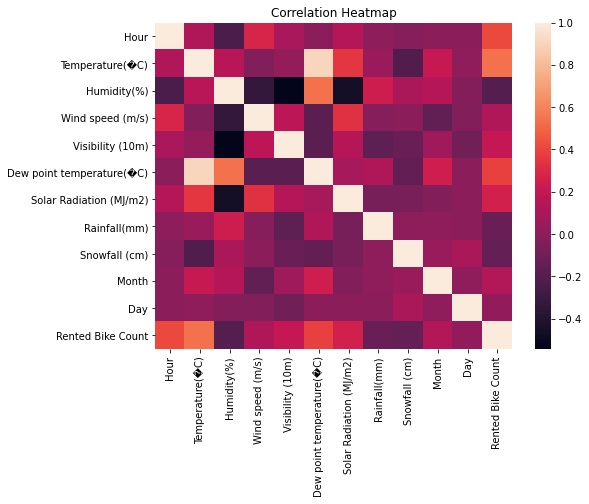

In [18]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr())
plt.title('Correlation Heatmap')
plt.show()

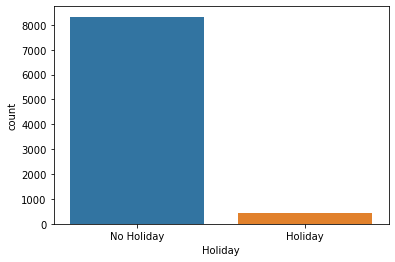

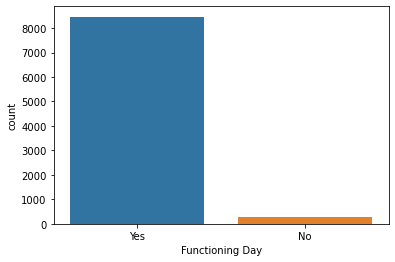

In [19]:
f = ['Holiday', 'Functioning Day']
for i in f:
    plt.figure()
    sns.countplot(x = i, data = df)

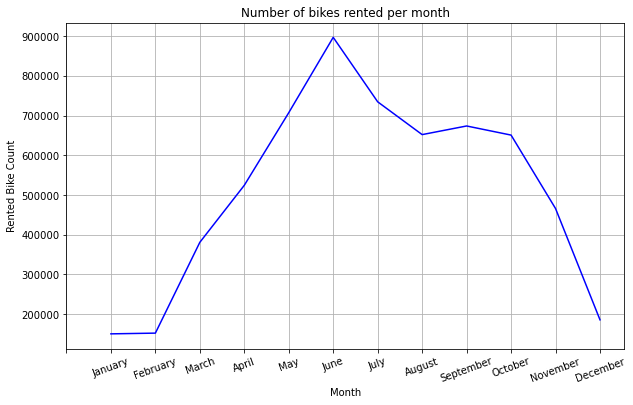

In [20]:
# number of bikes rented per month 
by_month = df.groupby('Month')['Rented Bike Count'].sum()
# plot figure
plt.figure(figsize=(10,6))
plt.plot(by_month, color="blue")
plt.xlabel('Month')
plt.ylabel('Rented Bike Count')
plt.title('Number of bikes rented per month')
plt.xticks(np.arange(13), calendar.month_name[0:13], rotation=20)
plt.grid()
plt.show()

- Most number of bikes were rented in the summer months. People did not prefer renting the bikes in the winter, probably due to the cold weather.

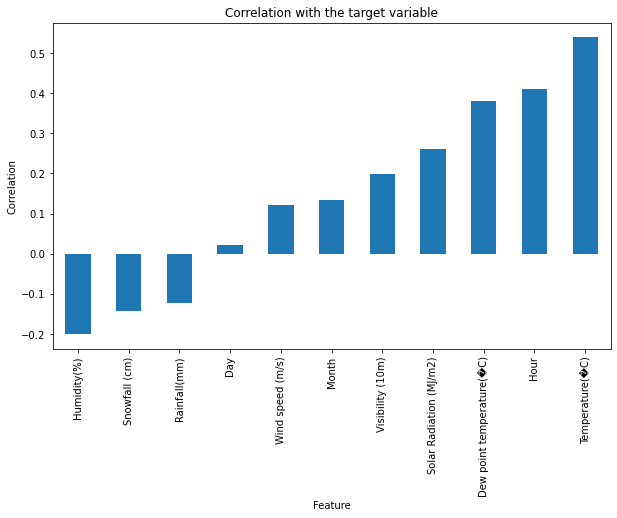

In [21]:
# plot to visualize the correlation
df.corr()['Rented Bike Count'].sort_values().drop('Rented Bike Count').plot(kind='bar',figsize = (10,6))
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.title('Correlation with the target variable')
plt.show()

> **Insights:**
> * **Negatively correlated:**
    * Humidity(%)     
    * Snowfall (cm)
    * Rainfall(mm)   
> * **Low Correlation:**
    * Day

---

# 6. Modelling <a class="anchor" id="6."></a>

In [22]:
# binary encoding the categorical features
df['Holiday'].replace({'No Holiday': 0, 'Holiday': 1},inplace = True)
df['Functioning Day'].replace({'No': 0, 'Yes': 1},inplace = True)

In [23]:
# one hot encoding the "seasons" feature
ohe = OneHotEncoder(sparse=False, drop='first')
ohe_df = pd.DataFrame(ohe.fit_transform(df[['Seasons']]))
ohe_df.columns = ohe.get_feature_names(['Seasons'])
df.drop(['Seasons'] ,axis=1, inplace=True)
df = pd.concat([df, ohe_df ], axis=1)

In [24]:
df.head()

,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,Day,Rented Bike Count,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,12,1,254,0.0,0.0,1.0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,12,1,204,0.0,0.0,1.0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,12,1,173,0.0,0.0,1.0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,12,1,107,0.0,0.0,1.0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,12,1,78,0.0,0.0,1.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hour                       8760 non-null   int64  
 1   Temperature(�C)            8760 non-null   float64
 2   Humidity(%)                8760 non-null   int64  
 3   Wind speed (m/s)           8760 non-null   float64
 4   Visibility (10m)           8760 non-null   int64  
 5   Dew point temperature(�C)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Rainfall(mm)               8760 non-null   float64
 8   Snowfall (cm)              8760 non-null   float64
 9   Holiday                    8760 non-null   int64  
 10  Functioning Day            8760 non-null   int64  
 11  Month                      8760 non-null   int64  
 12  Day                        8760 non-null   int64  
 13  Rented Bike Count          8760 non-null   int64

In [26]:
# defining X and y
X = df.drop(['Rented Bike Count'], axis =1)
y = df['Rented Bike Count']

In [27]:
# splitting data into train, validations and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 10)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.111, random_state = 10)

In [28]:
# printing shapes of split data
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(7008, 16)
(7008,)
(876, 16)
(876,)
(876, 16)
(876,)


(None, None)

In [29]:
# normalising the data for few algorithms
norm = MinMaxScaler().fit(X_train)
X_train_norm = pd.DataFrame(norm.transform(X_train))  
X_valid_norm = pd.DataFrame(norm.transform(X_valid)) 
X_test_norm = pd.DataFrame(norm.transform(X_test)) 

In [30]:
# Regression Models
models = [('Linear Regresion', LinearRegression()),
          ('KNN Regressor', KNeighborsRegressor()),
          ('Decision Tree Regressor', DecisionTreeRegressor()),
          ('Random Forest', RandomForestRegressor())]

for model in models: #for loop through the models
    reg = model[1]  #initialize the model object
    reg.fit(X_train,y_train)  #fitting the training data
    y_pred = reg.predict(X_valid)  #predict target
    print(model[0])
    # performance metrics
    print('R2: {:0.2f}'.format(r2_score(y_valid, y_pred)))
    print('RMSE: {:0.2f}'.format(np.sqrt(mean_squared_error(y_valid, y_pred))))
    print('-'*30)

Linear Regresion
R2: 0.56
RMSE: 441.09
------------------------------
KNN Regressor
R2: 0.55
RMSE: 446.44
------------------------------
Decision Tree Regressor
R2: 0.80
RMSE: 293.76
------------------------------
Random Forest
R2: 0.88
RMSE: 232.31
------------------------------


## Baseline model

Dummy Model
------------------------------
Train R2 Score: 0.00
R2 Score: -0.00
RMSE: 662.65
Time to compute: 0.0010 seconds
----------------------------------------------------------------------------------------------------


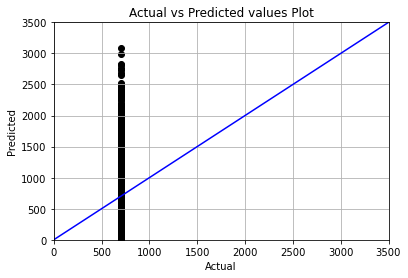

----------------------------------------------------------------------------------------------------


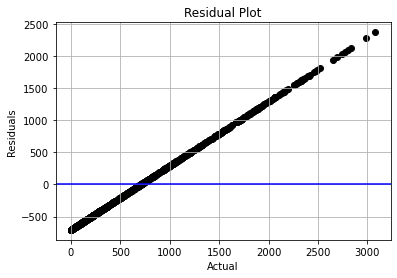

In [31]:
dummy_model = DummyRegressor()

start = datetime.now()
dummy_model.fit(X_train, y_train)
y_pred_train = dummy_model.predict(X_train)
y_pred = dummy_model.predict(X_valid)
stop = datetime.now()
delta = stop - start

# performance metrics
print('Dummy Model')
print('-'*30)
r2scoretr = r2_score(y_train, y_pred_train)
print('Train R2 Score: {:0.2f}'.format(r2scoretr))
r2score = r2_score(y_valid, y_pred)
print('R2 Score: {:0.2f}'.format(r2score))  
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print('RMSE: {:0.2f}'.format(rmse))
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: {:0.4f}'.format(seconds), 'seconds')
print('-'*100)

plt.figure(figsize=(6,4))
plt.ylim(0, 3500)
plt.xlim(0, 3500)
plt.scatter(y_pred, y_valid, color='black')
x = np.linspace(0,3500,100) 
y = x
plt.plot(x, y, color='blue')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Actual vs Predicted values Plot')
plt.grid()
plt.show()

print('-'*100)

plt.figure(figsize=(6,4))
y = np.linspace(0,3500,100)
x = np.linspace(0,0)
residuals = y_valid - y_pred
plt.scatter(x = y_valid, y = residuals, color = 'black')
plt.axhline(y=0, color='b', linestyle='-')
plt.xlabel("Actual")
plt.ylabel("Residuals")
plt.title('Residual Plot')
plt.grid()
plt.show()

baseline_model = ('Dummy Model', r2scoretr, r2score, rmse, seconds)

## 6.1. KNN Regressor <a class="anchor" id="6.1."></a>

KNN Regressor
------------------------------
Train R2 Score: 0.88
Validation R2 Score: 0.81
RMSE: 289.36
Time to compute: 1.2814 seconds
----------------------------------------------------------------------------------------------------


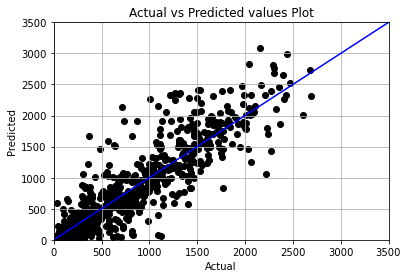

----------------------------------------------------------------------------------------------------


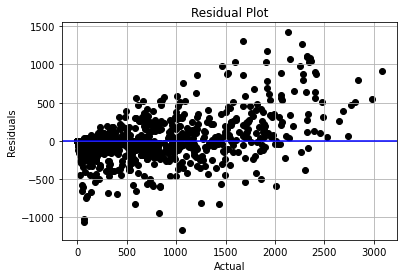

In [32]:
# KNN Regressor
knn = KNeighborsRegressor() 

start = datetime.now()
knn.fit(X_train_norm, y_train)
y_pred_train = knn.predict(X_train_norm)
y_pred = knn.predict(X_valid_norm)
stop = datetime.now()
delta = stop - start

# performance metrics
print('KNN Regressor')
print('-'*30)
r2scoretr = r2_score(y_train, y_pred_train)
print('Train R2 Score: {:0.2f}'.format(r2scoretr))
r2score = r2_score(y_valid, y_pred)
print('Validation R2 Score: {:0.2f}'.format(r2score))  
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print('RMSE: {:0.2f}'.format(rmse))
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: {:0.4f}'.format(seconds), 'seconds')
print('-'*100)

plt.figure(figsize=(6,4))
plt.ylim(0, 3500)
plt.xlim(0, 3500)
plt.scatter(y_pred, y_valid, color='black')
x = np.linspace(0,3500,100) 
y = x
plt.plot(x, y, color='blue')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Actual vs Predicted values Plot')
plt.grid()
plt.show()

print('-'*100)

plt.figure(figsize=(6,4))
y = np.linspace(0,3500,100)
x = np.linspace(0,0)
residuals = y_valid - y_pred
plt.scatter(x = y_valid, y = residuals, color = 'black')
plt.axhline(y=0, color='b', linestyle='-')
plt.xlabel("Actual")
plt.ylabel("Residuals")
plt.title('Residual Plot')
plt.grid()
plt.show()

knn_model = ('KNN Regressor', r2scoretr, r2score, rmse, seconds)

### 6.1.1. Hyper parameter tuning <a class="anchor" id="6.1.1."></a>

KNeighborsRegressor(n_neighbors=4, p=1)
------------------------------
KNN Regressor Tuned
------------------------------
Train R2 score: 0.90
Validation R2 score: 0.83
RMSE: 276.11
Time to compute: 1.1555 seconds
----------------------------------------------------------------------------------------------------


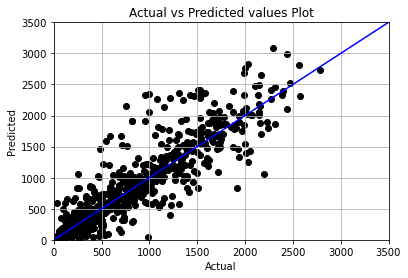

----------------------------------------------------------------------------------------------------


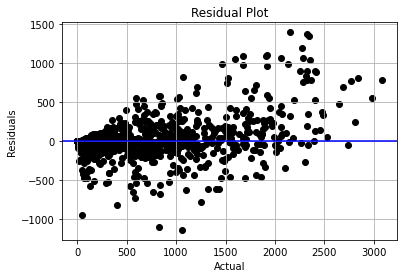

In [33]:
params = {
    'n_neighbors': list(range(1,11)), 
    'p': [1,2] # p=1 compute manhattan distance, p=2 compute euclidean distance
    }

knn = KNeighborsRegressor()

grid_knn = GridSearchCV(estimator = knn, param_grid = params, cv=5, n_jobs=-1)

grid_knn.fit(X_train_norm, y_train)
print(grid_knn.best_estimator_)
print('-'*30)

knn = grid_knn.best_estimator_

start = datetime.now()
knn.fit(X_train_norm, y_train)
y_pred_train = knn.predict(X_train_norm)
y_pred = knn.predict(X_valid_norm)
stop = datetime.now()
delta = stop - start

# performance metrics
print('KNN Regressor Tuned')
print('-'*30)
r2scoretr = r2_score(y_train, y_pred_train)
print('Train R2 score: {:0.2f}'.format(r2scoretr))
r2score = r2_score(y_valid, y_pred)
print('Validation R2 score: {:0.2f}'.format(r2score))  
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print('RMSE: {:0.2f}'.format(rmse))
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: {:0.4f}'.format(seconds), 'seconds')
print('-'*100)

plt.figure(figsize=(6,4))
plt.ylim(0, 3500)
plt.xlim(0, 3500)
plt.scatter(y_pred, y_valid, color='black')
x = np.linspace(0,3500,100) 
y = x
plt.plot(x, y, color='blue')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Actual vs Predicted values Plot')
plt.grid()
plt.show()

print('-'*100)

plt.figure(figsize=(6,4))
y = np.linspace(0,3500,100)
x = np.linspace(0,0)
residuals = y_valid - y_pred
plt.scatter(x = y_valid, y = residuals, color = 'black')
plt.axhline(y=0, color='b', linestyle='-')
plt.xlabel("Actual")
plt.ylabel("Residuals")
plt.title('Residual Plot')
plt.grid()
plt.show()

knn_hp_tuned_model = ('KNN Regressor Tuned', r2scoretr, r2score, rmse, seconds)

In [34]:
knn_results_df = pd.DataFrame(grid_knn.cv_results_)

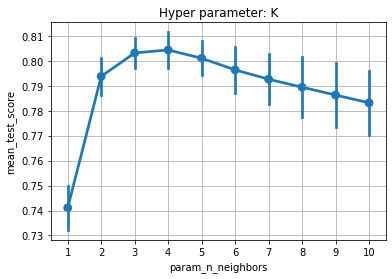

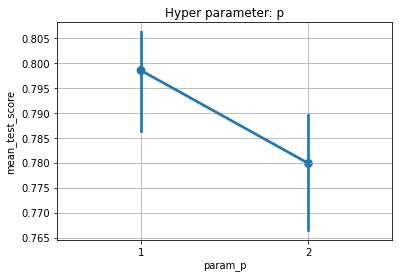

In [35]:
# hyper parameter: k
plt.figure(figsize=(6,4))
sns.pointplot(data = knn_results_df[['mean_test_score', 'param_n_neighbors']],
y = 'mean_test_score', x = 'param_n_neighbors')
plt.title('Hyper parameter: K')
plt.grid()
plt.show()

# hyper parameter: p
plt.figure(figsize=(6,4))
sns.pointplot(data = knn_results_df[['mean_test_score', 'param_p']],
y = 'mean_test_score', x = 'param_p')
plt.title('Hyper parameter: p')
plt.grid()
plt.show()

In [36]:
knn_results_df = knn_results_df.sort_values(by=["rank_test_score"])
knn_results_df = knn_results_df.set_index(
    knn_results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
knn_results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]].head()

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
4_1,"{'n_neighbors': 4, 'p': 1}",1,0.811455,0.010702
3_1,"{'n_neighbors': 3, 'p': 1}",2,0.809211,0.011487
5_1,"{'n_neighbors': 5, 'p': 1}",3,0.807809,0.009274
6_1,"{'n_neighbors': 6, 'p': 1}",4,0.805603,0.009818
7_1,"{'n_neighbors': 7, 'p': 1}",5,0.802583,0.012348


In [37]:
df_knn_results = pd.DataFrame([knn_model, baseline_model, knn_hp_tuned_model], columns=['Model', 'Train R2', 'R2', 'RMSE', 'Computation_Time'])
df_knn_results.sort_values('R2', ascending=False)

,Model,Train R2,R2,RMSE,Computation_Time
2,KNN Regressor Tuned,0.900832,0.826153,276.109430,1.155523
0,KNN Regressor,0.877772,0.809068,289.359522,1.281353
1,Dummy Model,0.000000,-0.001328,662.653312,0.000997


## 6.2. Decision Tree Regressor <a class="anchor" id="6.2."></a>

DT Regressor
------------------------------
Train R2 score: 1.00
Validation R2 score: 0.79
RMSE: 300.54
Time to compute: 0.0509 seconds
----------------------------------------------------------------------------------------------------


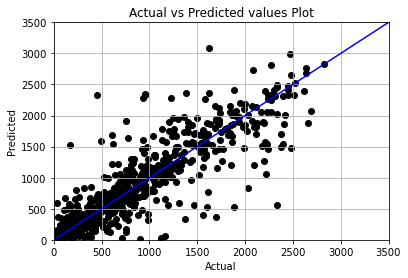

----------------------------------------------------------------------------------------------------


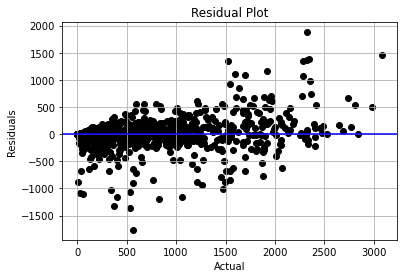

In [38]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state = 10)

start = datetime.now()
dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train) 
y_pred = dt.predict(X_valid)
stop = datetime.now()
delta = stop - start

# performance metrics
print('DT Regressor')
print('-'*30)
r2scoretr = r2_score(y_train, y_pred_train)
print('Train R2 score: {:0.2f}'.format(r2scoretr))
r2score = r2_score(y_valid, y_pred)
print('Validation R2 score: {:0.2f}'.format(r2score))  
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print('RMSE: {:0.2f}'.format(rmse))
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: {:0.4f}'.format(seconds), 'seconds')
print('-'*100)

plt.figure(figsize=(6,4))
plt.ylim(0, 3500)
plt.xlim(0, 3500)
plt.scatter(y_pred, y_valid, color='black')
x = np.linspace(0,3500,100) 
y = x
plt.plot(x, y, color='blue')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Actual vs Predicted values Plot')
plt.grid()
plt.show()

print('-'*100)

plt.figure(figsize=(6,4))
y = np.linspace(0,3500,100)
x = np.linspace(0,0)
residuals = y_valid - y_pred
plt.scatter(x = y_valid, y = residuals, color = 'black')
plt.axhline(y=0, color='b', linestyle='-')
plt.xlabel("Actual")
plt.ylabel("Residuals")
plt.title('Residual Plot')
plt.grid()
plt.show()

dt_model = ('DT Regressor', r2scoretr, r2score, rmse, seconds)

### 6.2.1. Hyper parameter tuning <a class="anchor" id="6.2.1."></a>

In [39]:
max_depth = list(range(1,21))
min_samples_leaf = list(range(1,11))
min_samples_split = list(range(1,36))

params = {'max_depth' : max_depth,
          'min_samples_leaf' : min_samples_leaf,
          'min_samples_split' : min_samples_split
         }

random_dt = RandomizedSearchCV(estimator = dt, param_distributions = params, n_iter = 100, cv = 5, random_state = 10, n_jobs = -1)

random_dt.fit(X_train, y_train)

random_dt.best_estimator_

DecisionTreeRegressor(max_depth=14, min_samples_leaf=3, min_samples_split=34,
                      random_state=10)

DecisionTreeRegressor(max_depth=14, min_samples_leaf=3, min_samples_split=32,
                      random_state=10)
------------------------------
DT Regressor Tuned
------------------------------
Train R2 Score: 0.91
Validation R2 Score: 0.83
RMSE: 274.53
Time to compute: 0.0379 seconds
----------------------------------------------------------------------------------------------------


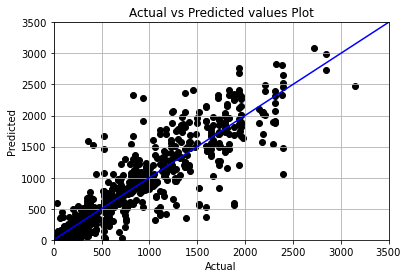

----------------------------------------------------------------------------------------------------


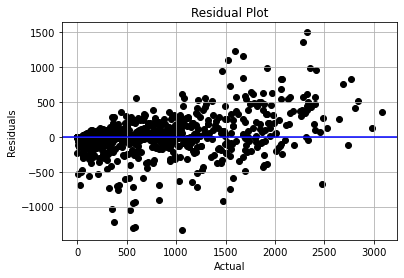

In [40]:
params = {'max_depth': list(range(10,21)), #The maximum depth of the tree
          'min_samples_leaf': list(range(1,6)), #The minimum number of samples required to be at a leaf node
          "min_samples_split": list(range(30,41))}

dt = DecisionTreeRegressor(random_state = 10)
grid_dt = GridSearchCV(estimator = dt, param_grid = params, cv = 5, n_jobs = -1)
grid_dt.fit(X_train, y_train)
print(grid_dt.best_estimator_)
print('-'*30)

dt = grid_dt.best_estimator_

start = datetime.now()
dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train) 
y_pred = dt.predict(X_valid)
stop = datetime.now()
delta = stop - start

# performance metrics
print('DT Regressor Tuned')
print('-'*30)
r2scoretr = r2_score(y_train, y_pred_train)
print('Train R2 Score: {:0.2f}'.format(r2scoretr))
r2score = r2_score(y_valid, y_pred)
print('Validation R2 Score: {:0.2f}'.format(r2score))  
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print('RMSE: {:0.2f}'.format(rmse))
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: {:0.4f}'.format(seconds), 'seconds')
print('-'*100)

plt.figure(figsize=(6,4))
plt.ylim(0, 3500)
plt.xlim(0, 3500)
plt.scatter(y_pred, y_valid, color='black')
x = np.linspace(0,3500,100) 
y = x
plt.plot(x, y, color='blue')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Actual vs Predicted values Plot')
plt.grid()
plt.show()

print('-'*100)

plt.figure(figsize=(6,4))
y = np.linspace(0,3500,100)
x = np.linspace(0,0)
residuals = y_valid - y_pred
plt.scatter(x = y_valid, y = residuals, color = 'black')
plt.axhline(y=0, color='b', linestyle='-')
plt.xlabel("Actual")
plt.ylabel("Residuals")
plt.title('Residual Plot')
plt.grid()
plt.show()

dt_tuned = ('DT Regressor Tuned', r2scoretr, r2score, rmse, seconds)

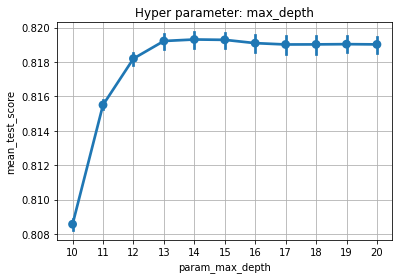

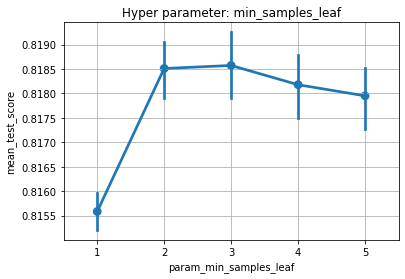

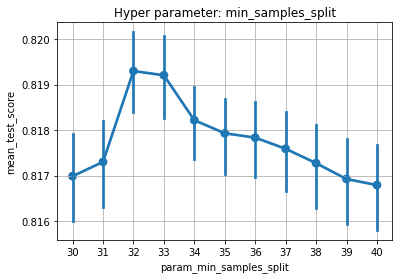

In [41]:
dt_results_df = pd.DataFrame(grid_dt.cv_results_)

# hyper parameter: max_depth
plt.figure(figsize=(6,4))
sns.pointplot(data = dt_results_df[['mean_test_score', 'param_max_depth']],
y = 'mean_test_score', x = 'param_max_depth')
plt.title('Hyper parameter: max_depth')
plt.grid()
plt.show()

# hyper parameter: min_samples_leaf
plt.figure(figsize=(6,4))
sns.pointplot(data = dt_results_df[['mean_test_score', 'param_min_samples_leaf']],
y = 'mean_test_score', x = 'param_min_samples_leaf')
plt.title('Hyper parameter: min_samples_leaf')
plt.grid()
plt.show()

# hyper parameter: min_samples_split
plt.figure(figsize=(6,4))
sns.pointplot(data = dt_results_df[['mean_test_score', 'param_min_samples_split']],
y = 'mean_test_score', x = 'param_min_samples_split')
plt.title('Hyper parameter: min_samples_split')
plt.grid()
plt.show()

In [42]:
results_df = dt_results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
14_3_32,"{'max_depth': 14, 'min_samples_leaf': 3, 'min_...",1,0.822159,0.008448
13_3_32,"{'max_depth': 13, 'min_samples_leaf': 3, 'min_...",2,0.822112,0.007618
13_3_33,"{'max_depth': 13, 'min_samples_leaf': 3, 'min_...",3,0.822025,0.007565
18_3_32,"{'max_depth': 18, 'min_samples_leaf': 3, 'min_...",4,0.822024,0.008916
17_3_32,"{'max_depth': 17, 'min_samples_leaf': 3, 'min_...",5,0.822020,0.008910
...,...,...,...,...
10_3_31,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_...",601,0.806669,0.010461
10_4_40,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",602,0.806582,0.010926
10_4_31,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",603,0.806514,0.009910


In [43]:
df_dt_results = pd.DataFrame([dt_model, baseline_model, dt_tuned], columns=['Model', 'Train R2', 'R2', 'RMSE', 'Computation_Time'])
df_dt_results.sort_values('R2', ascending=False)

,Model,Train R2,R2,RMSE,Computation_Time
2,DT Regressor Tuned,0.909788,0.828131,274.534826,0.037898
0,DT Regressor,1.000000,0.794028,300.540235,0.050863
1,Dummy Model,0.000000,-0.001328,662.653312,0.000997


# 7. Evaluating on Test <a class="anchor" id="7."></a>

In [44]:
results = pd.DataFrame([knn_model, baseline_model, knn_hp_tuned_model, dt_model, dt_tuned], columns = ['Model', 'Train R2', 'R2', 'RMSE', 'Computation_Time'])
results.sort_values('RMSE', ascending=True)

,Model,Train R2,R2,RMSE,Computation_Time
4,DT Regressor Tuned,0.909788,0.828131,274.534826,0.037898
2,KNN Regressor Tuned,0.900832,0.826153,276.109430,1.155523
0,KNN Regressor,0.877772,0.809068,289.359522,1.281353
3,DT Regressor,1.000000,0.794028,300.540235,0.050863
1,Dummy Model,0.000000,-0.001328,662.653312,0.000997


DT Regressor Test
------------------------------
Train R2 Score: 0.91
Test R2 Score: 0.84
RMSE: 254.02
Time to compute: 0.0439 seconds
----------------------------------------------------------------------------------------------------


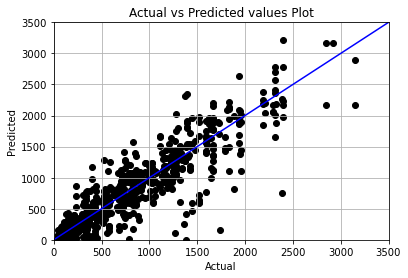

----------------------------------------------------------------------------------------------------


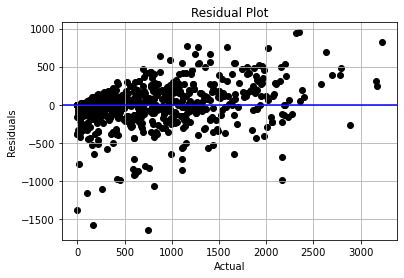

In [45]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=14, min_samples_leaf=3, min_samples_split=32, random_state=10) 

start = datetime.now()
dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train) 
y_pred = dt.predict(X_test)
stop = datetime.now()
delta = stop - start

# performance metrics
print('DT Regressor Test')
print('-'*30)
r2scoretr = r2_score(y_train, y_pred_train)
print('Train R2 Score: {:0.2f}'.format(r2scoretr))
r2score = r2_score(y_test, y_pred)
print('Test R2 Score: {:0.2f}'.format(r2score))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: {:0.2f}'.format(rmse))
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: {:0.4f}'.format(seconds), 'seconds')
print('-'*100)

plt.figure(figsize=(6,4))
plt.ylim(0, 3500)
plt.xlim(0, 3500)
plt.scatter(y_pred, y_test, color='black')
x = np.linspace(0,3500,100) 
y = x
plt.plot(x, y, color='blue')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Actual vs Predicted values Plot')
plt.grid()
plt.show()

print('-'*100)

plt.figure(figsize=(6,4))
y = np.linspace(0,3500,100)
x = np.linspace(0,0)
residuals = y_test - y_pred
plt.scatter(x = y_test, y = residuals, color = 'black')
plt.axhline(y=0, color='b', linestyle='-')
plt.xlabel("Actual")
plt.ylabel("Residuals")
plt.title('Residual Plot')
plt.grid()
plt.show()

dt_test = ('DT Regressor Test', r2scoretr, r2score, rmse, seconds)

---

# 8. Conclusion <a class="anchor" id="8."></a>

In [46]:
results = pd.DataFrame([knn_model, baseline_model, knn_hp_tuned_model, dt_model, dt_tuned, dt_test], columns = ['Model', 'Train R2', 'R2', 'RMSE', 'Computation_Time'])
results.sort_values('RMSE', ascending=True)

,Model,Train R2,R2,RMSE,Computation_Time
5,DT Regressor Test,0.909788,0.836626,254.024388,0.043883
4,DT Regressor Tuned,0.909788,0.828131,274.534826,0.037898
2,KNN Regressor Tuned,0.900832,0.826153,276.109430,1.155523
0,KNN Regressor,0.877772,0.809068,289.359522,1.281353
3,DT Regressor,1.000000,0.794028,300.540235,0.050863
1,Dummy Model,0.000000,-0.001328,662.653312,0.000997


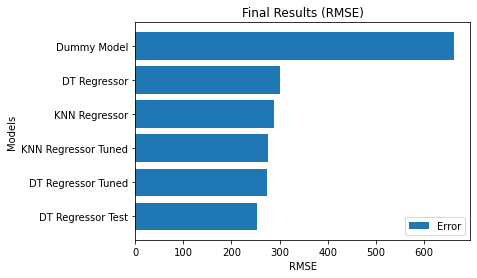

----------------------------------------------------------------------------------------------------


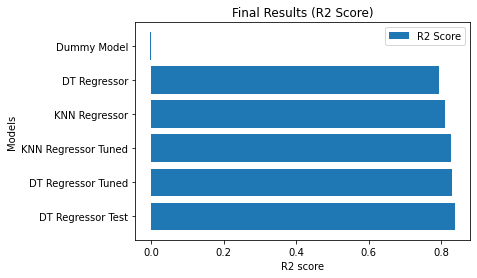

In [47]:
# RMSE
plt.figure(figsize=[6, 4])
plt.barh(['DT Regressor Test', 'DT Regressor Tuned', 'KNN Regressor Tuned', 'KNN Regressor', 'DT Regressor','Dummy Model'], [254.024388, 274.534826, 276.109430, 289.359522, 300.540235, 662.653312],label = "Error")
plt.legend()
plt.xlabel('RMSE')
plt.ylabel('Models')
plt.title('Final Results (RMSE)')
plt.show()

print('-'*100)

plt.figure(figsize=[6, 4])
plt.barh(['DT Regressor Test', 'DT Regressor Tuned', 'KNN Regressor Tuned', 'KNN Regressor', 'DT Regressor','Dummy Model'], [0.836626, 0.828131, 0.826153, 0.809068, 0.794028, -0.001328],label = "R2 Score")
plt.legend()
plt.xlabel('R2 score')
plt.ylabel('Models')
plt.title('Final Results (R2 Score)')
plt.show()

---

# 9. References <a class="anchor" id="9."></a>

>    * [Kaggle](https://www.kaggle.com/)
>    * [Machine Learning Mastery](https://machinelearningmastery.com/)
>    * [Analytics Vidhya](https://www.analyticsvidhya.com/)
>    * [Towards Data Science](https://towardsdatascience.com/)
>    * [Analytics India Mag](https://analyticsindiamag.com/)